In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cardata ={'mercedas':[1,5,None,5,3],'bmw':[5,8,2,6,5],'ford':[7,8,9,1,0],'reno':[4,9,None,None,7]}
carcatalog=pd.DataFrame(cardata)
carcatalog.index.rename("one",inplace=True)
print(carcatalog)

     mercedas  bmw  ford  reno
one                           
0         1.0    5     7   4.0
1         5.0    8     8   9.0
2         NaN    2     9   NaN
3         5.0    6     1   NaN
4         3.0    5     0   7.0


In [4]:
carcatalog_null = carcatalog.isnull()
print(carcatalog_null)

     mercedas    bmw   ford   reno
one                               
0       False  False  False  False
1       False  False  False  False
2        True  False  False   True
3       False  False  False   True
4       False  False  False  False


In [8]:
carcatalog_null_sum = carcatalog.isnull().sum()
print(carcatalog_null_sum)

mercedas    1
bmw         0
ford        0
reno        2
dtype: int64


In [10]:
carcatalog_describe = carcatalog.describe()
print(carcatalog_describe)

       mercedas       bmw    ford      reno
count  4.000000  5.000000  5.0000  3.000000
mean   3.500000  5.200000  5.0000  6.666667
std    1.914854  2.167948  4.1833  2.516611
min    1.000000  2.000000  0.0000  4.000000
25%    2.500000  5.000000  1.0000  5.500000
50%    4.000000  5.000000  7.0000  7.000000
75%    5.000000  6.000000  8.0000  8.000000
max    5.000000  8.000000  9.0000  9.000000


In [14]:
print(carcatalog['bmw'].std())
# count: تعداد مقادیر غیر نال در ستون.
# mean: میانگین مقادیر ستون.
# std: انحراف معیار مقادیر ستون.
# min: حداقل مقدار ستون.
# 25%: صدک بیست و پنج درصدی (چارک اول).
# 50%: صدک پنجاه درصدی (میانه یا مدیان).
# 75%: صدک هفتاد و پنج درصدی (چارک سوم).
# max: حداکثر مقدار ستون.

2.16794833886788


In [35]:
carcatalog_dropmissingvalue= carcatalog.dropna() #drop all rows which have missing value
carcatalog_dropmissingvalue2= carcatalog.dropna(axis=1)#axis=1 به معنی ستون‌ها (columns) است. drop all column which have missing value
print(carcatalog_dropmissingvalue,carcatalog_dropmissingvalue2)


     mercedas  bmw  ford  reno
one                           
0         1.0    5     7   4.0
1         5.0    8     8   9.0
2         2.0    2     9   2.0
3         5.0    6     1   2.0
4         3.0    5     0   7.0      mercedas  bmw  ford  reno
one                           
0         1.0    5     7   4.0
1         5.0    8     8   9.0
2         2.0    2     9   2.0
3         5.0    6     1   2.0
4         3.0    5     0   7.0


In [37]:
carcatalog_fill = carcatalog.fillna(2, inplace=False) #replace 2 with the Nan values
print(carcatalog_fill)

     mercedas  bmw  ford  reno
one                           
0         1.0    5     7   4.0
1         5.0    8     8   9.0
2         2.0    2     9   2.0
3         5.0    6     1   2.0
4         3.0    5     0   7.0


In [51]:
gayser = sns.load_dataset('geyser')
print(gayser)
gayser2=gayser.copy()

     duration  waiting   kind
0       3.600       79   long
1       1.800       54  short
2       3.333       74   long
3       2.283       62  short
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46  short
271     4.467       74   long

[272 rows x 3 columns]


In [103]:
Nondata1=[5,8,2,6,5,8,98,23,12]
Nondata2=[52,38,12,46,55,6,98,3,112]
                                            #add None value in the duration and waiting rows
for N in Nondata1 :
    gayser2.loc[N,'duration'] = None


for M in Nondata2 :
    gayser2.loc[M,'waiting'] = None
gayser3 = gayser2.copy()
print(gayser2)

     duration  waiting
0        1.50     50.0
1        2.25     55.0
2         NaN     60.0
3        4.00      NaN
4        5.00     90.0
5         NaN      NaN
8         NaN      NaN
6         NaN      NaN
98        NaN      NaN
23        NaN      NaN
12        NaN      NaN
52        NaN      NaN
38        NaN      NaN
46        NaN      NaN
55        NaN      NaN
112       NaN      NaN


<function matplotlib.pyplot.show(close=None, block=None)>

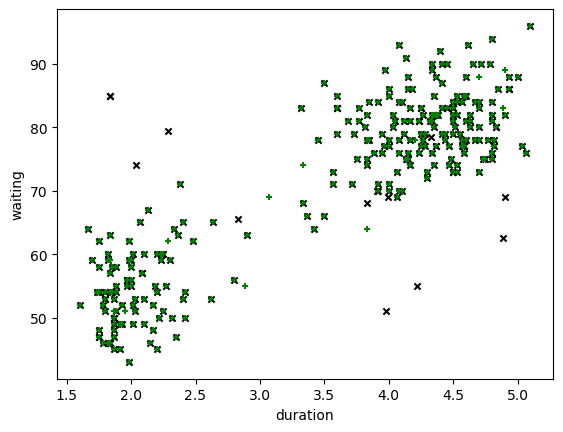

In [69]:
gayser2['duration'].interpolate(method='linear',inplace=True)
gayser2['waiting'].interpolate(method='linear',inplace=True)

# میان‌یابی خطی (linear interpolation) 
# Original DataFrame:
#    duration
# 0       1.5
# 1       NaN
# 2       3.0
# 3       NaN
# 4       5.0

# DataFrame after linear interpolation:
#    duration
# 0       1.5
# 1       2.25
# 2       3.0
# 3       4.0
# 4       5.0
# the Nan data replce with the min of 1.5 and 3.0 = 2.25
fig , ax = plt.subplots()
gayser2.plot.scatter(x='duration',y='waiting',color='black',marker='x',ax=ax)
gayser.plot.scatter(x='duration',y='waiting',color='green',marker='+',ax=ax)
plt.show

In [89]:

from sklearn import linear_model
gayserdrpoNa=gayser2.dropna()
model_1= linear_model.LinearRegression()
model_2= linear_model.LinearRegression()
model_1.fit(X=gayserdrpoNa[['duration']],y=gayserdrpoNa['waiting'])
model_2.fit(X=gayserdrpoNa[['waiting']],y=gayserdrpoNa['duration'])

LinearRegression()

In [105]:
print(gayser3)

     duration  waiting
0        1.50     50.0
1        2.25     55.0
2         NaN     60.0
3        4.00      NaN
4        5.00     90.0
5         NaN      NaN
8         NaN      NaN
6         NaN      NaN
98        NaN      NaN
23        NaN      NaN
12        NaN      NaN
52        NaN      NaN
38        NaN      NaN
46        NaN      NaN
55        NaN      NaN
112       NaN      NaN


In [111]:
import pandas as pd

from sklearn import linear_model

# داده‌های نمونه با مقادیر نال
data = {
    'duration': [1.5, None, 3.0, 4.0, 5.0],
    'waiting': [50, 55, 60, 70,None]
}

# ساخت DataFrame
gayser2 = pd.DataFrame(data)

# حذف مقادیر گمشده
# gayserdrpoNa = gayser2.dropna()
gayserdrpoNa = gayser2.fillna(1000,inplace=False)
# ایجاد مدل‌های رگرسیون خطی
model_1 = linear_model.LinearRegression()
model_2 = linear_model.LinearRegression()

# آموزش مدل‌ها
model_1.fit(X=gayserdrpoNa[['duration']], y=gayserdrpoNa['waiting'])
model_2.fit(X=gayserdrpoNa[['waiting']], y=gayserdrpoNa['duration'])

# پیش‌بینی‌ها
predicted_waiting = model_1.predict([[3.5]])  # پیش‌بینی waiting برای duration=3.5
predicted_duration = model_2.predict([[65]])  # پیش‌بینی duration برای waiting=65

print(f"Predicted waiting for duration=3.5: {predicted_waiting[0]}")
print(f"Predicted duration for waiting=65: {predicted_duration[0]}")


Predicted waiting for duration=3.5: 294.58030283314275
Predicted duration for waiting=65: 251.42282574966853


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
